### Setup the notebook and import the libraries

In [1]:
from ds1054z import DS1054Z
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import numpy as np

These libraries are needed to display the oscilloscope data

In [2]:
from IPython.display import Image, display

Verify the oscilloscope connection

In [3]:
scope = DS1054Z('192.168.1.206')
print(scope.idn)

RIGOL TECHNOLOGIES,DS1054Z,DS1ZA200902668,00.04.04.SP3


In [4]:
scope.run()

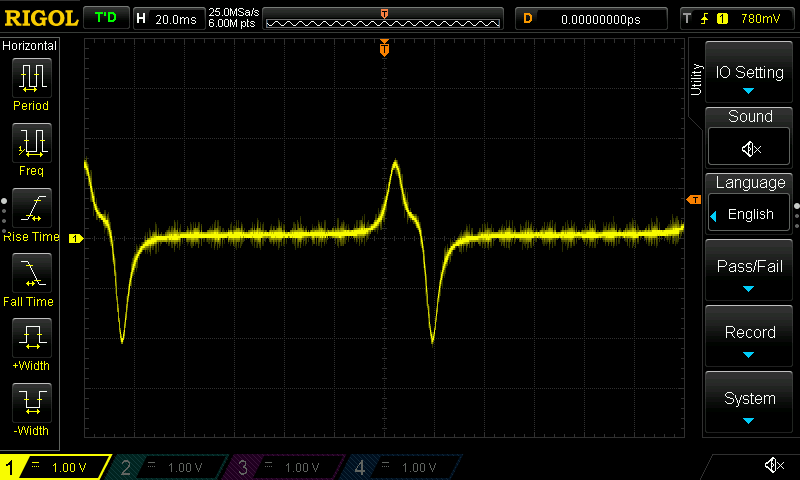

In [5]:
bmap_scope = scope.display_data
display(Image(bmap_scope))

We can change the scale for channel 1, if needed

In [6]:
scope.set_channel_scale(1, 0.5)

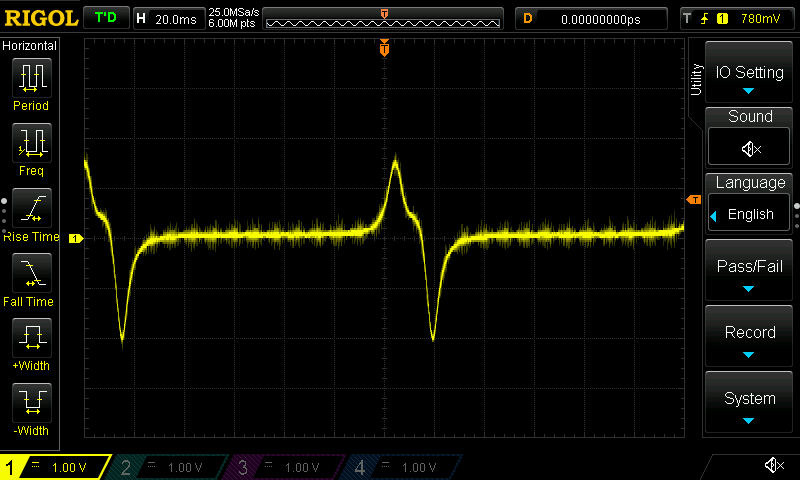

In [7]:
bmap_scope = scope.display_data
display(Image(bmap_scope))

That looks like it clips, so back to 1.00 V/Div

In [8]:
scope.set_channel_scale(1, 1.0)

### Downloading a waveform (screen)

Pull the first channel of data into this notebook, begin by stopping scope.

In [9]:
scope.stop()

Save off the vertical scale characteristics

In [10]:
d_voltage_scale = scope.get_channel_scale(1)
d_voltage_scale

1.0

Store the vertical axis scale features

In [11]:
d_timebase_scale_actual = float(scope.query(':TIMebase:SCAle?'))
d_timebase_scale_actual

0.02

Calculate the sampling frequency in samples/second

In [12]:
d_fs = 1200/(12.0 * d_timebase_scale_actual)
d_fs

5000.0

Store the instrument value, useful for documentation

In [13]:
str_idn = scope.idn
str_idn

'RIGOL TECHNOLOGIES,DS1054Z,DS1ZA200902668,00.04.04.SP3'

Acquire the signal in normal mode (just the samples displayed on the screen)

In [14]:
d_ch1 = scope.get_waveform_samples(1, mode='NORM')

Restore the scope to run mode

In [15]:
scope.run()

Before plotting the data, create the timeseries for the independent axis

In [16]:
i_ns = len(d_ch1)
np_d_time = np.linspace(0,(i_ns-1),i_ns)/d_fs

<function matplotlib.pyplot.show(close=None, block=None)>

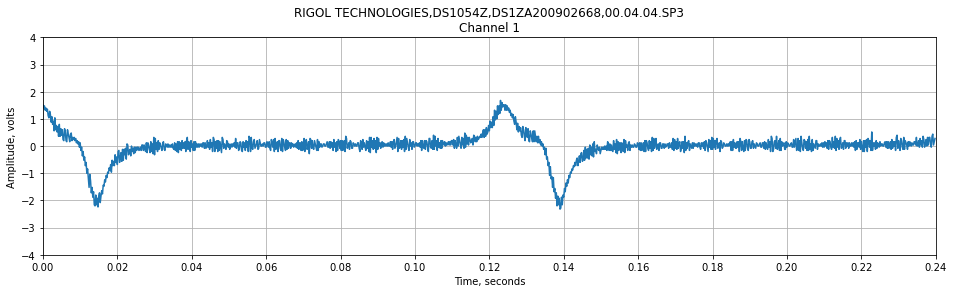

In [17]:
plt.rcParams['figure.figsize'] = [16, 4]
plt.figure
plt.plot(np_d_time, d_ch1)
plt.grid()

plt.xlabel('Time, seconds')
xmax = 12.0*d_timebase_scale_actual
plt.xlim([0, xmax])
plt.xticks(np.linspace(0, xmax, 13))
ax = plt.gca()
ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))

plt.ylabel('Amplitude, volts')
plt.ylim([-4.0*d_voltage_scale, 4.0 *d_voltage_scale])
plt.title(str_idn + '\n' + 'Channel 1')
plt.show

### Download a waveform (RAW)

The previous example downloaded just the samples on the screen. This example takes it a step further and downloads the data stored in memory. The overall approach will be similar, but some of the details are different. Begin by getting the information needed to make sense of the signals.

In [26]:
scope.stop()
d_voltage_scale_raw = scope.get_channel_scale(1)
d_voltage_scale_raw

1.0

For this example, the sampling frequency can be downloaded directly from the scope.

In [27]:
d_fs_raw = float(scope.query(":ACQuire:SRATe?"))
d_fs_raw

25000000.0

The number of samples is also pulled from the instrument

In [28]:
i_ns_raw = scope.memory_depth_internal_currently_shown
i_ns_raw

6000000

To keep up good practices, I will pull the instrument identification again

In [29]:
str_idn_raw = scope.idn
str_idn_raw

'RIGOL TECHNOLOGIES,DS1054Z,DS1ZA200902668,00.04.04.SP3'

Last, but by no means least, the data can be downloaded from the oscilloscope. This takes a lot of time, on the order of minutes for my arrangement.

In [30]:
d_ch1_raw = scope.get_waveform_samples(1, mode='RAW')

Setting up the timeseries for this raw waveform

In [23]:
np_d_time_raw = np.linspace(0,(i_ns_raw-1), i_ns_raw)/d_fs_raw

Restart the scope

In [24]:
scope.run()

This channel signal data can now be plotted

ValueError: x and y must have same first dimension, but have shapes (6000000,) and (0,)

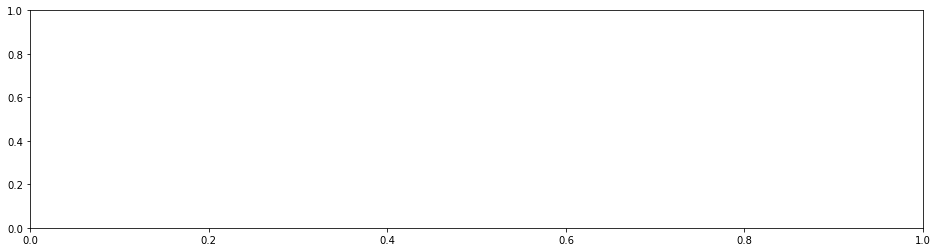

In [25]:
plt.rcParams['figure.figsize'] = [16, 4]
plt.figure
plt.plot(np_d_time_raw, d_ch1_raw)
plt.grid()

plt.xlabel('Time, seconds')
xmax = float(i_ns_raw)/d_fs_raw
plt.xlim([0, xmax])
plt.xticks(np.linspace(0, xmax, 13))
ax = plt.gca()
ax.xaxis.set_major_formatter(FormatStrFormatter('%0.2f'))

plt.ylabel('Amplitude, volts')
plt.ylim([-4.0*d_voltage_scale_raw, 4.0 *d_voltage_scale_raw])
plt.title(str_idn_raw + '\n' + 'Raw Channel 1')

plt.show